In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = sns.load_dataset('tips')

In [3]:
print(data)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [4]:
# # Removing null values
# data = data.dropna()

data = pd.get_dummies(data, drop_first=True)
corr_matrix = data.corr()

In [5]:
print(corr_matrix)

             total_bill       tip      size  sex_Female  smoker_No   day_Fri  \
total_bill     1.000000  0.675734  0.598315   -0.144877  -0.085721 -0.086168   
tip            0.675734  1.000000  0.489299   -0.088862  -0.005929 -0.055463   
size           0.598315  0.489299  1.000000   -0.086195   0.133178 -0.142184   
sex_Female    -0.144877 -0.088862 -0.086195    1.000000   0.002816  0.071060   
smoker_No     -0.085721 -0.005929  0.133178    0.002816   1.000000 -0.244316   
day_Fri       -0.086168 -0.055463 -0.142184    0.071060  -0.244316  1.000000   
day_Sat        0.054919 -0.002790 -0.041121   -0.053957  -0.155744 -0.216319   
day_Sun        0.122953  0.125114  0.193054   -0.168106   0.181624 -0.195451   
time_Dinner    0.183118  0.121629  0.103411   -0.205231  -0.054921 -0.058159   

              day_Sat   day_Sun  time_Dinner  
total_bill   0.054919  0.122953     0.183118  
tip         -0.002790  0.125114     0.121629  
size        -0.041121  0.193054     0.103411  
sex_Female 

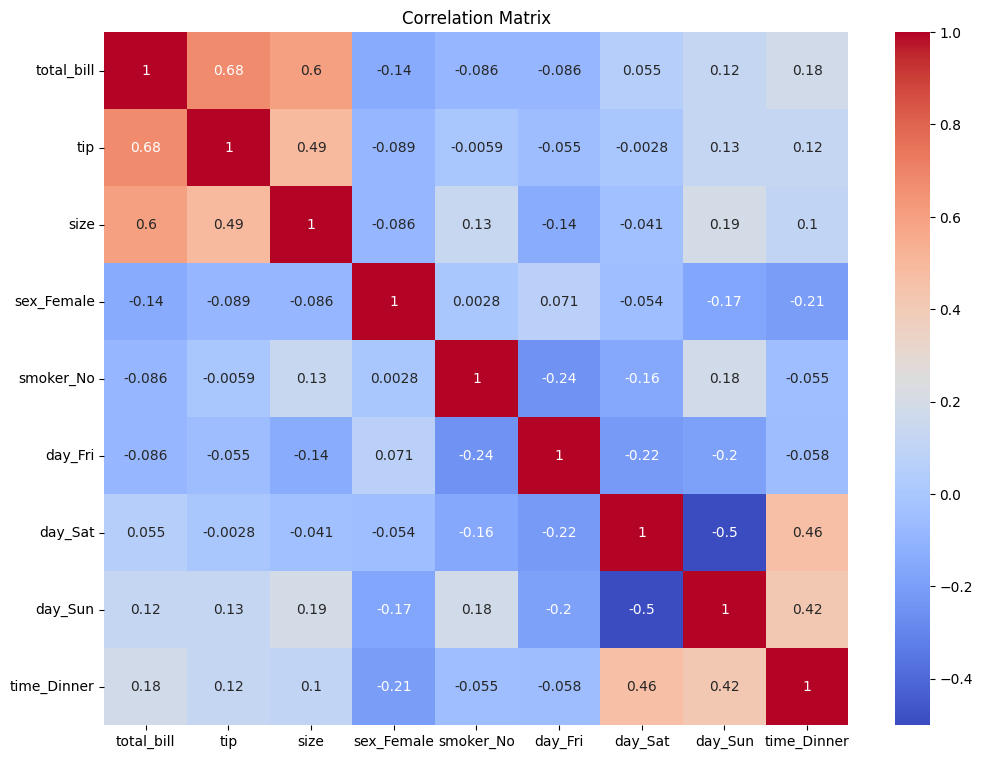

In [6]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

In [7]:
upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.8

In [8]:
# columns_to_drop = [column for column in upper_corr_matrix.columns if any(abs(upper_corr_matrix[column]) > threshold)]

# print("Columns to drop (correlation threshold):", columns_to_drop)

In [9]:
columns_to_drop = [column for column in upper_corr_matrix.columns
                   if any((abs(upper_corr_matrix[column]) > threshold) &
                          (abs(upper_corr_matrix[column]) < 0.99))]

print("Columns to drop (correlation threshold):", columns_to_drop)

Columns to drop (correlation threshold): []


In [10]:
data = data.drop(columns=columns_to_drop)

In [11]:
print(data)

     total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0         16.99  1.01     2        True       True    False    False     True   
1         10.34  1.66     3       False       True    False    False     True   
2         21.01  3.50     3       False       True    False    False     True   
3         23.68  3.31     2       False       True    False    False     True   
4         24.59  3.61     4        True       True    False    False     True   
..          ...   ...   ...         ...        ...      ...      ...      ...   
239       29.03  5.92     3       False       True    False     True    False   
240       27.18  2.00     2        True      False    False     True    False   
241       22.67  2.00     2       False      False    False     True    False   
242       17.82  1.75     2       False       True    False     True    False   
243       18.78  3.00     2        True       True    False    False    False   

     time_Dinner  
0       

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# apply multiple linear regression to data

X = data.drop('tip', axis=1)
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


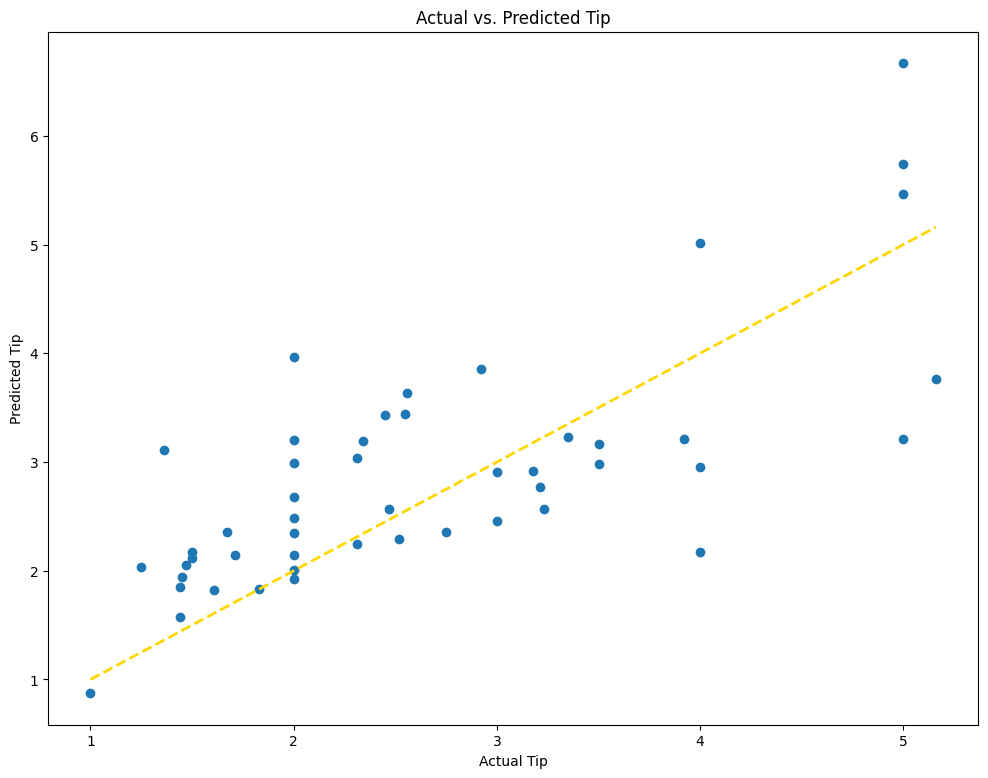

In [19]:
#plot the line graph

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Actual vs. Predicted Tip")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gold', linewidth=2)
plt.show()
